In [5]:
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import numpy as np
from pandas_summary import DataFrameSummary
import pandas_profiling as pp
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import random
%matplotlib inline
from IPython.core.debugger import set_trace #!!TODO: remove this

In [4]:
np.random.randint(0, high=5, size=(2,3))

array([[0, 4, 0],
       [2, 1, 4]])

In [106]:
import scipy
S = scipy.sparse.random(3, 4, density=0.35)
tmp = S.A
tmp


array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.41824435, 0.52377017],
       [0.88570544, 0.        , 0.17882353, 0.        ]])

In [50]:
tmp_int = np.ceil(tmp*6)-1
scored_inds = tmp_int >= 0
scored_inds

array([[False,  True, False, False],
       [False, False,  True,  True],
       [False,  True, False, False]])

In [109]:
tmp_int

array([[-1.,  0., -1., -1.],
       [-1., -1.,  2.,  5.],
       [-1.,  5., -1., -1.]])

In [110]:
np.random.rand(2,3)

array([[0.36315619, 0.25742299, 0.88980521],
       [0.83652955, 0.16315537, 0.67623867]])

In [122]:
tmp_int.reshape(12,1)

array([[-1.],
       [ 0.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 2.],
       [ 5.],
       [-1.],
       [ 5.],
       [-1.],
       [-1.]])

In [114]:
tmp_int**2

array([[ 1.,  0.,  1.,  1.],
       [ 1.,  1.,  4., 25.],
       [ 1., 25.,  1.,  1.]])

In [66]:
Y = tmp_int
R = tmp_int >= 0
X = np.array([[1,0,2,0], [0,1,0,0], [0,0,0,1]])
print(Y)
print(R)
print(X)

[[-1.  0. -1. -1.]
 [-1. -1.  2.  5.]
 [-1.  5. -1. -1.]]
[[False  True False False]
 [False False  True  True]
 [False  True False False]]
[[1 0 2 0]
 [0 1 0 0]
 [0 0 0 1]]


In [112]:
np.array([1,2,3,4,5,6]).reshape(2,3).sum()

21

In [108]:
zz = (0,5)
zz[-1]

5

In [67]:
print(X*R)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [60]:
np.mean(Y*R, axis=1)[:, np.newaxis]

array([[0.  ],
       [1.75],
       [1.25]])

In [62]:
Y_minus_products_means = Y-np.mean(Y*R, axis=1)[:, np.newaxis]
Y_minus_products_means

array([[-1.  ,  0.  , -1.  , -1.  ],
       [-2.75, -2.75,  0.25,  3.25],
       [-2.25,  3.75, -2.25, -2.25]])

In [92]:
XX = np.random.rand(*X.shape)
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=False).fit(XX, Y_minus_products_means)
print(XX)

[[0.75392934 0.93363804 0.02310552 0.91782992]
 [0.36086434 0.62629728 0.60468062 0.03171122]
 [0.04300634 0.10552932 0.0841582  0.07343448]]


In [93]:
lr.predict(XX)

array([[-1.00000000e+00, -2.13162821e-14, -1.00000000e+00,
        -1.00000000e+00],
       [-2.75000000e+00, -2.75000000e+00,  2.50000000e-01,
         3.25000000e+00],
       [-2.25000000e+00,  3.75000000e+00, -2.25000000e+00,
        -2.25000000e+00]])

In [94]:
lr.coef_

array([[ 27.29645222,   1.62660233, -21.23096314, -24.63168963],
       [-59.13887079,  -8.01825022,  36.12259427,  55.82520372],
       [ 32.22330904,   3.59626662, -20.93231102, -30.68984468],
       [ 37.15016585,   5.56593091, -20.63365891, -36.74799973]])

In [97]:
XX.dot(lr.coef_.T) 

array([[-1.00000000e+00, -2.13162821e-14, -1.00000000e+00,
        -1.00000000e+00],
       [-2.75000000e+00, -2.75000000e+00,  2.50000000e-01,
         3.25000000e+00],
       [-2.25000000e+00,  3.75000000e+00, -2.25000000e+00,
        -2.25000000e+00]])

In [98]:
XX

array([[0.75392934, 0.93363804, 0.02310552, 0.91782992],
       [0.36086434, 0.62629728, 0.60468062, 0.03171122],
       [0.04300634, 0.10552932, 0.0841582 , 0.07343448]])

In [99]:
R

array([[False,  True, False, False],
       [False, False,  True,  True],
       [False,  True, False, False]])

In [100]:
XX*R

array([[0.        , 0.93363804, 0.        , 0.        ],
       [0.        , 0.        , 0.60468062, 0.03171122],
       [0.        , 0.10552932, 0.        , 0.        ]])

In [101]:
lr_filt = LinearRegression(fit_intercept=False).fit(XX*R, Y_minus_products_means*R)

In [103]:
lr_filt.coef_

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.44826412, 0.        , 0.        ],
       [0.        , 0.        , 0.41230744, 0.02162261],
       [0.        , 0.        , 5.35999677, 0.28109388]])

In [85]:
X1d = np.array([1,2.5,3,7.6,10.2,15])[:,np.newaxis]
y1d = 3 + 2*X1d
lr1d = LinearRegression().fit(X1d,y1d)

In [87]:
lr1d.coef_, lr1d.intercept_

(array([[2.]]), array([3.]))

In [35]:
tmp[~scored_inds] = np.nan
tmp

array([[       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan, 0.33919088],
       [       nan,        nan, 0.98279623, 0.66437247]])

In [42]:
theta = np.random.rand(*tmp.shape)
theta

array([[0.9209042 , 0.51099245, 0.15265583, 0.21024998],
       [0.53781806, 0.75405935, 0.00155555, 0.25793837],
       [0.78496357, 0.33826438, 0.11142428, 0.64792235]])

In [ ]:
Y = S.A

In [12]:
np.mean([1,2,3,4,5])

3.0

In [123]:
train_set_df = pd.read_csv("mercari-price-suggestion-challenge/train.tsv", sep='\t' )

In [31]:
train_set_df.iloc[0:200, :].to_csv("mercari-price-suggestion-challenge/train_small.csv", sep=',' )

In [34]:
len(train_set_df.iloc[0:200, :]['name'].unique())

200

In [17]:
len(train_set_df.category_name.unique())

1288

In [127]:
len(train_set_df.category_name.unique())

1288

In [149]:
print(len(train_set_df.name.unique()))
print(len(train_set_df))
print(len(train_set_df.category_name.unique()))

1225273
1482535
1288


In [141]:
def split_cat(text):
    try:
        return text.split("/")
    except:
        return ("No Label", "No Label", "No Label")

train_set_df['general_cat'], train_set_df['subcat_1'], train_set_df['subcat_2'] = \
    zip(*train_set_df['category_name'].apply(lambda x: split_cat(x)))
print(len(train_set_df['general_cat'].unique()))

print( train_set_df.head() )

11
   train_id                                 name  item_condition_id  \
0         0  MLB Cincinnati Reds T Shirt Size XL                  3   
1         1     Razer BlackWidow Chroma Keyboard                  3   
2         2                       AVA-VIV Blouse                  1   
3         3                Leather Horse Statues                  1   
4         4                 24K GOLD plated rose                  1   

                                       category_name brand_name  price  \
0                                  Men/Tops/T-shirts        NaN   10.0   
1  Electronics/Computers & Tablets/Components & P...      Razer   52.0   
2                        Women/Tops & Blouses/Blouse     Target   10.0   
3                 Home/Home Décor/Home Décor Accents        NaN   35.0   
4                            Women/Jewelry/Necklaces        NaN   44.0   

   shipping                                   item_description  general_cat  \
0         1                                 No

In [151]:
from sklearn.preprocessing import OneHotEncoder
sub_df = train_set_df[['general_cat']]
sub_df.head()
enc  = OneHotEncoder().fit(sub_df)
one_hot_df = enc.transform(sub_df)
print(one_hot_df.A[:5,:])
print(one_hot_df.A[:5,:].shape)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(5, 11)


In [144]:
print(sub_df.head())

   general_cat  shipping
0          Men         1
1  Electronics         0
2        Women         1
3         Home         1
4        Women         0


In [146]:
enc.get_feature_names()

array(['x0_Beauty', 'x0_Electronics', 'x0_Handmade', 'x0_Home', 'x0_Kids',
       'x0_Men', 'x0_No Label', 'x0_Other', 'x0_Sports & Outdoors',
       'x0_Vintage & Collectibles', 'x0_Women'], dtype=object)

In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import stop_words
import re, string
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenize(text):
    """
    sent_tokenize(): segment text into sentences
    word_tokenize(): break sentences into words
    """
    try: 
        regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]')
        text = regex.sub(" ", text) # remove punctuation
        
        tokens_ = [word_tokenize(s) for s in sent_tokenize(text)]
        tokens = []
        for token_by_sent in tokens_:
            tokens += token_by_sent
        tokens = list(filter(lambda t: t.lower() not in stop, tokens))
        filtered_tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
        filtered_tokens = [w.lower() for w in filtered_tokens if len(w)>=3]
        
        return filtered_tokens
            
    except TypeError as e: print(text,e)
stop = set(stop_words.ENGLISH_STOP_WORDS)
vectorizer = TfidfVectorizer(min_df=10,
                             max_features=180000,
                             tokenizer=tokenize,
                             ngram_range=(1, 2))
all_desc = train_set_df['item_description'].values
vz = vectorizer.fit_transform(list(all_desc))
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(
                    dict(tfidf), orient='index')
tfidf.columns = ['tfidf']
tfidf.sort_values(by=['tfidf'], ascending=True).head(10)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Matan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ValueError: np.nan is an invalid document, expected byte or unicode string.

In [166]:
print(len(stop_words.ENGLISH_STOP_WORDS))

318


In [ ]:
vectorizer = CountVectorizer(vocabulary = kws)
X = vectorizer.fit_transform(corpus).toarray()

In [167]:
lens= [ len(df) for n,df in train_set_df.groupby("name")]
    

(array([0.00000000e+00, 9.32138756e-01, 3.99960168e-02, 1.16059542e-02,
        5.12673173e-03, 2.84782153e-03, 1.78345945e-03, 1.21046699e-03,
        8.85608013e-04, 6.70939895e-04, 5.41975779e-04, 3.89341034e-04,
        3.33837491e-04, 2.65274290e-04, 2.26095318e-04, 1.96711089e-04,
        1.53450974e-04, 1.54267202e-04, 1.25699202e-04, 1.22434287e-04,
        9.14176013e-05, 8.65202298e-05, 8.24390869e-05, 7.50930297e-05,
        5.22386293e-05, 5.87684580e-05, 4.81574864e-05, 5.38710865e-05,
        3.75465148e-05, 4.08114292e-05, 3.67302862e-05, 3.34653719e-05,
        3.26491433e-05, 2.69355432e-05, 2.69355432e-05, 2.44868575e-05,
        2.28544003e-05, 2.28544003e-05, 1.79570288e-05, 1.55083431e-05,
        1.87732574e-05, 1.63245717e-05, 1.63245717e-05, 1.55083431e-05,
        9.79474300e-06, 1.22434287e-05, 1.06109716e-05, 8.16228583e-06,
        9.79474300e-06, 5.71360008e-06, 8.16228583e-06, 1.30596573e-05,
        4.89737150e-06, 4.08114292e-06, 8.16228583e-06, 6.529828

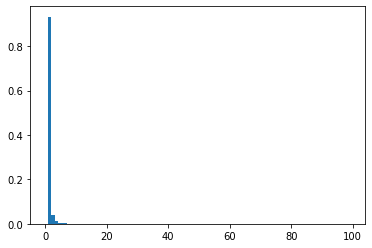

In [170]:
plt.hist(lens, bins = np.arange(0,100), density=True)

In [175]:
stds= [ df['price'].std() for n,df in train_set_df.groupby("category_name")] 


(array([0.00847458, 0.00423729, 0.01271186, 0.02118644, 0.03050847,
        0.02288136, 0.03559322, 0.03813559, 0.04661017, 0.03898305,
        0.04067797, 0.04915254, 0.0559322 , 0.04067797, 0.04067797,
        0.03050847, 0.03898305, 0.02711864, 0.02457627, 0.01440678,
        0.03050847, 0.03050847, 0.02033898, 0.01440678, 0.02288136,
        0.02033898, 0.00932203, 0.01355932, 0.01440678, 0.01525424,
        0.01101695, 0.01101695, 0.00677966, 0.00932203, 0.01016949,
        0.00677966, 0.00847458, 0.00423729, 0.00762712, 0.00677966,
        0.0059322 , 0.00677966, 0.00762712, 0.00762712, 0.00254237,
        0.00338983, 0.00254237, 0.00338983, 0.00254237, 0.00254237,
        0.00254237, 0.00254237, 0.00169492, 0.00423729, 0.00254237,
        0.00338983, 0.00254237, 0.00169492, 0.00254237, 0.00084746,
        0.00084746, 0.00084746, 0.00254237, 0.00084746, 0.00084746,
        0.        , 0.        , 0.00169492, 0.00423729, 0.        ,
        0.00169492, 0.        , 0.        , 0.00

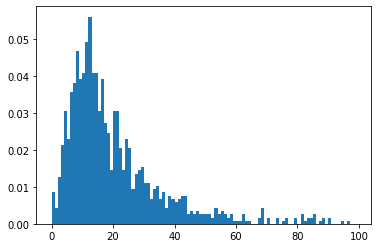

In [176]:
plt.hist(stds, bins = np.arange(0,100), density=True)

In [180]:
len(stds)

1287

In [181]:
stds_cat_and_ship = [ df['price'].std() for n,df in train_set_df.groupby(["category_name", 'shipping'])] 


In [182]:
len(stds_cat_and_ship)

2436

(array([0.00959342, 0.01096391, 0.02238465, 0.02740978, 0.03426222,
        0.03426222, 0.03563271, 0.04568296, 0.03837369, 0.04339881,
        0.04202832, 0.04202832, 0.04751028, 0.04157149, 0.03746003,
        0.0370032 , 0.02603929, 0.01964367, 0.03015075, 0.02969392,
        0.02055733, 0.01873001, 0.02329831, 0.01553221, 0.01964367,
        0.01507538, 0.0169027 , 0.01279123, 0.00730927, 0.01370489,
        0.01142074, 0.00959342, 0.00639561, 0.00822293, 0.00730927,
        0.00730927, 0.00593878, 0.00593878, 0.00822293, 0.00502513,
        0.00685244, 0.00319781, 0.00548196, 0.00502513, 0.0045683 ,
        0.00548196, 0.00502513, 0.00365464, 0.00365464, 0.00091366,
        0.00365464, 0.00137049, 0.00091366, 0.00411147, 0.00365464,
        0.00274098, 0.00365464, 0.00137049, 0.00182732, 0.00137049,
        0.00319781, 0.00228415, 0.00228415, 0.00045683, 0.00091366,
        0.00091366, 0.00137049, 0.00319781, 0.00045683, 0.00274098,
        0.        , 0.00091366, 0.00045683, 0.00

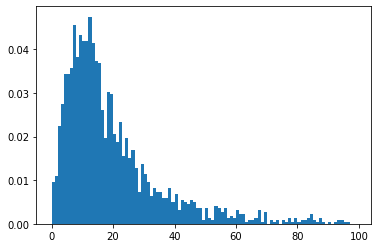

In [183]:
plt.hist(stds_cat_and_ship, bins = np.arange(0,100), density=True)

In [186]:
for name, df in train_set_df.groupby(["category_name", 'shipping']):
    print(name)

('Beauty/Bath & Body/Bath', 0)
('Beauty/Bath & Body/Bath', 1)
('Beauty/Bath & Body/Bathing Accessories', 0)
('Beauty/Bath & Body/Bathing Accessories', 1)
('Beauty/Bath & Body/Cleansers', 0)
('Beauty/Bath & Body/Cleansers', 1)
('Beauty/Bath & Body/Other', 0)
('Beauty/Bath & Body/Other', 1)
('Beauty/Bath & Body/Scrubs & Body Treatments', 0)
('Beauty/Bath & Body/Scrubs & Body Treatments', 1)
('Beauty/Bath & Body/Sets', 0)
('Beauty/Bath & Body/Sets', 1)
('Beauty/Fragrance/Candles & Home Scents', 0)
('Beauty/Fragrance/Candles & Home Scents', 1)
('Beauty/Fragrance/Kids', 0)
('Beauty/Fragrance/Kids', 1)
('Beauty/Fragrance/Men', 0)
('Beauty/Fragrance/Men', 1)
('Beauty/Fragrance/Other', 0)
('Beauty/Fragrance/Other', 1)
('Beauty/Fragrance/Sets', 0)
('Beauty/Fragrance/Sets', 1)
('Beauty/Fragrance/Women', 0)
('Beauty/Fragrance/Women', 1)
('Beauty/Hair Care/Conditioners', 0)
('Beauty/Hair Care/Conditioners', 1)
('Beauty/Hair Care/Hair & Scalp Treatments', 0)
('Beauty/Hair Care/Hair & Scalp Treatmen

('Handmade/Holidays/Thanksgiving', 1)
('Handmade/Holidays/Valentine', 0)
('Handmade/Holidays/Valentine', 1)
('Handmade/Housewares/Bathroom', 0)
('Handmade/Housewares/Cleaning', 0)
('Handmade/Housewares/Entertaining/Serving', 0)
('Handmade/Housewares/Entertaining/Serving', 1)
('Handmade/Housewares/Home Decor', 0)
('Handmade/Housewares/Home Decor', 1)
('Handmade/Housewares/Kitchen', 0)
('Handmade/Housewares/Kitchen', 1)
('Handmade/Housewares/Lighting', 0)
('Handmade/Housewares/Lighting', 1)
('Handmade/Housewares/Magnets', 0)
('Handmade/Housewares/Magnets', 1)
('Handmade/Housewares/Office', 1)
('Handmade/Housewares/Other', 0)
('Handmade/Housewares/Other', 1)
('Handmade/Housewares/Pillows', 0)
('Handmade/Housewares/Pillows', 1)
('Handmade/Housewares/Storage Solutions', 0)
('Handmade/Housewares/Wall Decor', 0)
('Handmade/Housewares/Wall Decor', 1)
('Handmade/Jewelry/Books and Zines', 1)
('Handmade/Jewelry/Clothing', 1)
('Handmade/Jewelry/Jewelry', 0)
('Handmade/Jewelry/Jewelry', 1)
('Handma

('Kids/Boys (4+)/Accessories', 1)
('Kids/Boys (4+)/Bottoms', 0)
('Kids/Boys (4+)/Bottoms', 1)
('Kids/Boys (4+)/Coats & Jackets', 0)
('Kids/Boys (4+)/Coats & Jackets', 1)
('Kids/Boys (4+)/Other', 0)
('Kids/Boys (4+)/Other', 1)
('Kids/Boys (4+)/Shoes', 0)
('Kids/Boys (4+)/Shoes', 1)
('Kids/Boys (4+)/Swimwear', 0)
('Kids/Boys (4+)/Swimwear', 1)
('Kids/Boys (4+)/Top & T-shirts', 0)
('Kids/Boys (4+)/Top & T-shirts', 1)
('Kids/Boys 0-24 Mos/Accessories', 0)
('Kids/Boys 0-24 Mos/Accessories', 1)
('Kids/Boys 0-24 Mos/Bottoms', 0)
('Kids/Boys 0-24 Mos/Bottoms', 1)
('Kids/Boys 0-24 Mos/Coats & Jackets', 0)
('Kids/Boys 0-24 Mos/Coats & Jackets', 1)
('Kids/Boys 0-24 Mos/One-Pieces', 0)
('Kids/Boys 0-24 Mos/One-Pieces', 1)
('Kids/Boys 0-24 Mos/Other', 0)
('Kids/Boys 0-24 Mos/Other', 1)
('Kids/Boys 0-24 Mos/Shoes', 0)
('Kids/Boys 0-24 Mos/Shoes', 1)
('Kids/Boys 0-24 Mos/Swimwear', 0)
('Kids/Boys 0-24 Mos/Swimwear', 1)
('Kids/Boys 0-24 Mos/Tops & T-Shirts', 0)
('Kids/Boys 0-24 Mos/Tops & T-Shirts', 1

('Men/Swimwear/Swim Trunks', 1)
('Men/Tops/Button-Front', 0)
('Men/Tops/Button-Front', 1)
('Men/Tops/Dress Shirts', 0)
('Men/Tops/Dress Shirts', 1)
('Men/Tops/Hawaiian', 0)
('Men/Tops/Hawaiian', 1)
('Men/Tops/Henley', 0)
('Men/Tops/Henley', 1)
('Men/Tops/Other', 0)
('Men/Tops/Other', 1)
('Men/Tops/Polo, Rugby', 0)
('Men/Tops/Polo, Rugby', 1)
('Men/Tops/T-shirts', 0)
('Men/Tops/T-shirts', 1)
('Men/Tops/Tank', 0)
('Men/Tops/Tank', 1)
('Men/Tops/Turtleneck', 0)
('Men/Tops/Turtleneck', 1)
('Other/Automotive/Automotive Enthusiast Merchandise', 0)
('Other/Automotive/Automotive Enthusiast Merchandise', 1)
('Other/Automotive/Car Care', 0)
('Other/Automotive/Car Care', 1)
('Other/Automotive/Car Electronics & Accessories', 0)
('Other/Automotive/Car Electronics & Accessories', 1)
('Other/Automotive/Exterior Accessories', 0)
('Other/Automotive/Exterior Accessories', 1)
('Other/Automotive/Interior Accessories', 0)
('Other/Automotive/Interior Accessories', 1)
('Other/Automotive/Lights & Lighting Acc

('Vintage & Collectibles/Supplies/Chain', 1)
('Vintage & Collectibles/Supplies/Charm', 0)
('Vintage & Collectibles/Supplies/Charm', 1)
('Vintage & Collectibles/Supplies/Ephemera', 1)
('Vintage & Collectibles/Supplies/Fabric', 0)
('Vintage & Collectibles/Supplies/Fabric', 1)
('Vintage & Collectibles/Supplies/Finding', 0)
('Vintage & Collectibles/Supplies/Finding', 1)
('Vintage & Collectibles/Supplies/Other', 0)
('Vintage & Collectibles/Supplies/Other', 1)
('Vintage & Collectibles/Supplies/Pattern', 0)
('Vintage & Collectibles/Supplies/Pattern', 1)
('Vintage & Collectibles/Supplies/Trim', 0)
('Vintage & Collectibles/Supplies/Trim', 1)
('Vintage & Collectibles/Supplies/Yarn', 0)
('Vintage & Collectibles/Supplies/Yarn', 1)
('Vintage & Collectibles/Supplies/Zipper', 0)
('Vintage & Collectibles/Toy/Action Figure', 0)
('Vintage & Collectibles/Toy/Action Figure', 1)
('Vintage & Collectibles/Toy/Animal', 0)
('Vintage & Collectibles/Toy/Animal', 1)
('Vintage & Collectibles/Toy/Block', 0)
('Vinta

In [189]:
zip(train_set_df[["category_name", 'shipping']]) == ('Beauty/Fragrance/Other', 0)

False

In [191]:
tmp = train_set_df.set_index(["category_name", 'shipping'])

In [195]:
tmp.set_index('train_id')['general_cat'].values

array(['Men', 'Electronics', 'Women', ..., 'Sports & Outdoors', 'Home',
       'Women'], dtype=object)

In [192]:
tmp.loc[('Beauty/Fragrance/Other', 0)]

C:\Users\Matan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


train_id  \
category_name          shipping             
Beauty/Fragrance/Other 0           139247   
                       0           163602   
                       0           274408   
                       0           347877   
                       0           581783   
                       0           670897   
                       0           788815   
                       0           928061   
                       0           946203   
                       0          1235692   
                       0          1241035   
                       0          1298632   
                       0          1310050   
                       0          1400641   
                       0          1425742   
                       0          1429614   

                                                                     name  \
category_name          shipping                                             
Beauty/Fragrance/Other 0         31 EMPTY Young Living Bottle / RESERVED!   
                       0                            Lush Snowcake Perfume   
                       0                       Empty Young living bottles   
                       0                                        Jo Malone   
                       0                 Bergamot tea tree and lemon oils   
                       0                                          Kaigirl   
                       0                  Lush Olive Branch Solid Perfume   
                       0                                     Fluffy slime   
                       0               Jo Malone Amber & Lavender Cologne   
                       0                                 Calvin Klein One   
                       0                        Green Apple Crunchy Slime   
                       0         Large Eau de Parfum Diptyque Tam Dao New   
                       0                Beautiful Day Fine Fragrance Mist   
                       0                              Twilight Body Spray   
                       0               Young Living Essential Oils Bundle   
                       0                       Kenneth Cole black perfume   

                                 item_condition_id         brand_name  price  \
category_name          shipping                                                
Beauty/Fragrance/Other 0                         3                NaN   28.0   
                       0                         3               Lush   74.0   
                       0                         3  Bath & Body Works   16.0   
                       0                         3                NaN   39.0   
                       0                         2                NaN   24.0   
                       0                         3                NaN   89.0   
                       0                         3                NaN   24.0   
                       0                         1                NaN    8.0   
                       0                         2                NaN   18.0   
                       0                         1                NaN   26.0   
                       0                         1                NaN    8.0   
                       0                         2                NaN   89.0   
                       0                         3  Bath & Body Works   10.0   
                       0                         1                NaN   88.0   
                       0                         1                NaN   24.0   
                       0                         1            Sephora   16.0   

                                                                  item_description  \
category_name          shipping                                                      
Beauty/Fragrance/Other 0         31 Empty bottles, 5 ml and 15 ml, for sale. Al...   
                       0         Lush Snowcake liquid perfume. Marzipan scented...   
                       0                         A

In [199]:
max(1, 2.3)

2.3

In [104]:
m, mm

(array([[[45, 27, 42],
         [ 7, 36, 19]],
 
        [[ 3, 11, 46],
         [40, 60,  6]],
 
        [[34, 31, 42],
         [38, 27, 39]],
 
        [[73, 57,  3],
         [62, 67,  1]],
 
        [[15, 98,  6],
         [66, 88, 99]]]),
 array([[[ 3, 99, 56],
         [72, 46, 70]],
 
        [[68, 25,  5],
         [91, 72, 34]],
 
        [[12, 53,  2],
         [14,  7, 69]],
 
        [[89, 47, 13],
         [30,  4, 17]],
 
        [[47, 86, 28],
         [63, 80, 18]]]))

In [107]:
m*mm


array([[[ 135, 2673, 2352],
        [ 504, 1656, 1330]],

       [[ 204,  275,  230],
        [3640, 4320,  204]],

       [[ 408, 1643,   84],
        [ 532,  189, 2691]],

       [[6497, 2679,   39],
        [1860,  268,   17]],

       [[ 705, 8428,  168],
        [4158, 7040, 1782]]])

In [109]:
np.max(m*mm, axis=0)

array([[6497, 8428, 2352],
       [4158, 7040, 2691]])

In [102]:
import numpy as np
# import np.random
m = np.random.randint(0, 100, size=(5, 2, 3))
mm = np.random.randint(0, 100, size=(5, 2, 3))

In [112]:
A = np.array([[1,2,3], [4,5,6], [7,8,9], [1,1,1],[2,2,2]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 1, 1],
       [2, 2, 2]])

In [113]:
m

array([[[45, 27, 42],
        [ 7, 36, 19]],

       [[ 3, 11, 46],
        [40, 60,  6]],

       [[34, 31, 42],
        [38, 27, 39]],

       [[73, 57,  3],
        [62, 67,  1]],

       [[15, 98,  6],
        [66, 88, 99]]])

In [116]:
m[:,0,1] = np.array[A[:,2], A[:,1], A[:0], A[:1]]
m

array([[[45,  3, 42],
        [ 7, 36, 19]],

       [[ 3,  6, 46],
        [40, 60,  6]],

       [[34,  9, 42],
        [38, 27, 39]],

       [[73,  1,  3],
        [62, 67,  1]],

       [[15,  2,  6],
        [66, 88, 99]]])

In [120]:
np.array([A[:,2], A[:,1], A[:,0], A[:1]])


array([array([3, 6, 9, 1, 2]), array([2, 5, 8, 1, 2]),
       array([1, 4, 7, 1, 2]), array([[1, 2, 3]])], dtype=object)

In [121]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 1, 1],
       [2, 2, 2]])

In [123]:
B = np.copy(A)
B

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 1, 1],
       [2, 2, 2]])

In [124]:
B[0,0] = 7
B

array([[7, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 1, 1],
       [2, 2, 2]])

In [125]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 1, 1],
       [2, 2, 2]])

In [126]:
C = A

In [127]:
C[0,0] = 9
A

array([[9, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 1, 1],
       [2, 2, 2]])

In [70]:
kernel


array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])

In [72]:
np.arange(5,0,-1)/100

array([0.05, 0.04, 0.03, 0.02, 0.01])

In [85]:
kernel = np.arange(5,0,-1)/100
temp = kernel[:, np.newaxis].dot(np.arange(1,6)[np.newaxis, :])
print(temp)
temp.sum(axis=0)

[[0.05 0.1  0.15 0.2  0.25]
 [0.04 0.08 0.12 0.16 0.2 ]
 [0.03 0.06 0.09 0.12 0.15]
 [0.02 0.04 0.06 0.08 0.1 ]
 [0.01 0.02 0.03 0.04 0.05]]


array([0.15, 0.3 , 0.45, 0.6 , 0.75])

In [78]:
kernel[:, np.newaxis]

array([[0.05],
       [0.04],
       [0.03],
       [0.02],
       [0.01]])

In [80]:
np.arange(1,6)[np.newaxis, :].shape

(1, 5)

In [128]:
A

array([[9, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 1, 1],
       [2, 2, 2]])

In [130]:
A[:,:,None].shape

(5, 3, 1)

In [89]:
b= [a]*3

[array([[1],
        [2],
        [3]]),
 array([[1],
        [2],
        [3]]),
 array([[1],
        [2],
        [3]])]

In [133]:
m = np.random.uniform( size=(5, 2))
m

array([[0.08210182, 0.81018534],
       [0.50012392, 0.65938366],
       [0.91461112, 0.35879139],
       [0.82010446, 0.37834646],
       [0.34617954, 0.78813178]])

In [135]:
m[m < 0.5]

array([0.08210182, 0.35879139, 0.37834646, 0.34617954])

In [138]:
tmp = np.array([1,2,3,4,5])

In [142]:
np.maximum(tmp,3)

array([3, 3, 3, 4, 5])

In [205]:
np.mean(list(range(4)))

1.5

In [207]:
a = [1, 2, np.nan, 3, np.nan]

In [209]:
np.nan_to_num(a)

array([1., 2., 0., 3., 0.])

In [210]:
A = np.array([[0.2,3.3],[4.1, 7.2]])

In [211]:
A

array([[0.2, 3.3],
       [4.1, 7.2]])

In [212]:
np.ceil(A, dtype=int)

TypeError: No loop matching the specified signature and casting was found for ufunc ceil